# STEP- 1 :DATA COLLECTION 
keyword  - india , covid ,wave , delhi 

date - 28-08-21 to 2-09-21.

In [1]:
import nest_asyncio
nest_asyncio.apply()
import twint

# Step-2 : DataBase Formation

In [2]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('nep_raw.csv')
df.head()

Datetime      Tweet Id  \
0  2021-11-14 19:47:24+00:00  1.460000e+18   
1  2021-11-14 14:03:56+00:00  1.460000e+18   
2  2021-11-14 06:32:57+00:00  1.460000e+18   
3  2021-11-14 04:44:08+00:00  1.460000e+18   
4  2021-11-14 04:03:27+00:00  1.460000e+18   

                                               tweet      Username  
0  @WIONews @palkisu Yes. Let us have an uniform ...    abdedaloho  
1  @ANINewsUP Yesterday it was Bharat who went to...     sasidash1  
2  Need a new Education Policy for India. Present...     vnshukla9  
3  Happy children's day to my dear tiny tots. You...  HJOGENSINGH2  
4  @monica_thapar @SadhguruJV So that's why Sadhg...   gowdapatils

# STEP -3 : Data Preprocessing
Cleaning ,
Stemming ,
Tokenization ,
Lemmization

In [4]:
df.dropna(subset=['tweet'], inplace=True)
#df.drop(['Unnamed: 1' , 'Unnamed: 2' ,'Unnamed: 5', 'Unnamed: 6' ,'Unnamed: 7','Unnamed: 8' ,'Unnamed: 9'],
 # axis='columns', inplace=True)
df

Datetime      Tweet Id  \
0     2021-11-14 19:47:24+00:00  1.460000e+18   
1     2021-11-14 14:03:56+00:00  1.460000e+18   
2     2021-11-14 06:32:57+00:00  1.460000e+18   
3     2021-11-14 04:44:08+00:00  1.460000e+18   
4     2021-11-14 04:03:27+00:00  1.460000e+18   
...                         ...           ...   
9098  2020-09-15 09:35:08+00:00  1.310000e+18   
9099  2020-09-15 09:18:35+00:00  1.310000e+18   
9100  2020-09-15 08:29:10+00:00  1.310000e+18   
9101  2020-09-15 08:28:40+00:00  1.310000e+18   
9102  2020-09-15 07:53:02+00:00  1.310000e+18   

                                                  tweet         Username  
0     @WIONews @palkisu Yes. Let us have an uniform ...       abdedaloho  
1     @ANINewsUP Yesterday it was Bharat who went to...        sasidash1  
2     Need a new Education Policy for India. Present...        vnshukla9  
3     Happy children's day to my dear tiny tots. You...     HJOGENSINGH2  
4     @monica_thapar @SadhguruJV So that's why Sadhg...      gowdapatils  
...                                                 ...              ...  
9098  National Education Policy: We're working to ma...  SanjivRanjanJh1  
9099  National Education Policy: We're working to ma...   ShivamGumber11  
9100  National Education Policy: We're working to ma...      hari_feb_09  
9101  National Education Policy: We're working to ma...       mygovindia  
9102  Knowledge is power . Mata Swarasti sub ko aash...      savitha_rao  

[9103 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9102
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  9103 non-null   object 
 1   Tweet Id  9103 non-null   float64
 2   tweet     9103 non-null   object 
 3   Username  9103 non-null   object 
dtypes: float64(1), object(3)
memory usage: 355.6+ KB


In [6]:
import re

df.tweet=df.tweet.apply(lambda x : x.lower())
df.tweet = df.tweet.apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df.tweet.head()


0    wionews palkisu yes let us have an uniform edu...
1    aninewsup yesterday it was bharat who went to ...
2    need a new education policy for india present ...
3    happy childrens day to my dear tiny tots you a...
4    monica_thapar sadhgurujv so thats why sadhguru...
Name: tweet, dtype: object

In [7]:
df.head()

Datetime      Tweet Id  \
0  2021-11-14 19:47:24+00:00  1.460000e+18   
1  2021-11-14 14:03:56+00:00  1.460000e+18   
2  2021-11-14 06:32:57+00:00  1.460000e+18   
3  2021-11-14 04:44:08+00:00  1.460000e+18   
4  2021-11-14 04:03:27+00:00  1.460000e+18   

                                               tweet      Username  
0  wionews palkisu yes let us have an uniform edu...    abdedaloho  
1  aninewsup yesterday it was bharat who went to ...     sasidash1  
2  need a new education policy for india present ...     vnshukla9  
3  happy childrens day to my dear tiny tots you a...  HJOGENSINGH2  
4  monica_thapar sadhgurujv so thats why sadhguru...   gowdapatils

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
def cleanText(text):
    
    lemma = WordNetLemmatizer()
    stp = stopwords.words('english')
    
    # This means remove everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    text = text.lower()
    
    # This mean split sentences by words ("I am good" => ["I","am","good"])
    text = nltk.word_tokenize(text)
    
    # Lemmatizers convert words to their base form using dictionaries (going => go, bees => be , dog => dog)
    text = [lemma.lemmatize(word) for word in text]
    
    # We should remove stopwords, stopwords are the words that has no special meaning such as I,You,Me,Was
    text = [word for word in text if word not in stp]
    
    # Everything is ready, now we just need join the elements of lists (["feel","good"] => "feel good")
    text = " ".join(text)
    
    return text


In [9]:
#calling clean_text function created above to clean the text column of our dataframe
clean_text=[]
for w in df.tweet:
    clean_text.append(cleanText(w))
    

In [10]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vidipt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vidipt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
clean_text[1:10]

['aninewsup yesterday wa bharat went ravana get wisdom thanks india home minister today alexander defeated chandragupta maurya thanks chief minister knowledge per new education policy',
 'need new education policy india present education system elephant lion monkey put set test declared qualified disqualified notmyschool httpstcoejvuazs8vc',
 'happy childrens day dear tiny tot teacher teaching community making change education policy country pillar next generation india httpstcoetmedn4zug',
 'monica thapar sadhgurujv thats sadhguru writing education policy india nourish child correct',
 'kapilsibal kapi saheb congress divided people also divided indiadivided telugu speaking state ap amp telangana language spoken betrayed hindu amp sikh framed draconian lawsimprisoned veteran congressman 1975 emergency spoiledamp confused education policy',
 'bengaluru host state first national education policy conclave isdc nationaleducationpolicy education httpstco6qivabomfj',
 'wishing happy children

In [12]:
df['clean_tweet'] = clean_text

# Final Processed Data 

In [13]:
df

Datetime      Tweet Id  \
0     2021-11-14 19:47:24+00:00  1.460000e+18   
1     2021-11-14 14:03:56+00:00  1.460000e+18   
2     2021-11-14 06:32:57+00:00  1.460000e+18   
3     2021-11-14 04:44:08+00:00  1.460000e+18   
4     2021-11-14 04:03:27+00:00  1.460000e+18   
...                         ...           ...   
9098  2020-09-15 09:35:08+00:00  1.310000e+18   
9099  2020-09-15 09:18:35+00:00  1.310000e+18   
9100  2020-09-15 08:29:10+00:00  1.310000e+18   
9101  2020-09-15 08:28:40+00:00  1.310000e+18   
9102  2020-09-15 07:53:02+00:00  1.310000e+18   

                                                  tweet         Username  \
0     wionews palkisu yes let us have an uniform edu...       abdedaloho   
1     aninewsup yesterday it was bharat who went to ...        sasidash1   
2     need a new education policy for india present ...        vnshukla9   
3     happy childrens day to my dear tiny tots you a...     HJOGENSINGH2   
4     monica_thapar sadhgurujv so thats why sadhguru...      gowdapatils   
...                                                 ...              ...   
9098  national education policy were working to make...  SanjivRanjanJh1   
9099  national education policy were working to make...   ShivamGumber11   
9100  national education policy were working to make...      hari_feb_09   
9101  national education policy were working to make...       mygovindia   
9102  knowledge is power  mata swarasti sub ko aashi...      savitha_rao   

                                            clean_tweet  
0     wionews palkisu yes let u uniform education po...  
1     aninewsup yesterday wa bharat went ravana get ...  
2     need new education policy india present educat...  
3     happy childrens day dear tiny tot teacher teac...  
4     monica thapar sadhgurujv thats sadhguru writin...  
...                                                 ...  
9098  national education policy working make india k...  
9099  national education policy working make india k...  
9100  national education policy working make india k...  
9101  national education policy working make india k...  
9102  knowledge power mata swarasti sub ko aashirwad...  

[9103 rows x 5 columns]

# STEP -3 : Sentiment Analysis using VANDER (Valence Aware Dictionary and SEntiment Reasoner)

In [14]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [15]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['clean_tweet'].apply(tokenizer.tokenize)
words_descriptions.head()
words_descriptions

0       [wionews, palkisu, yes, let, u, uniform, educa...
1       [aninewsup, yesterday, wa, bharat, went, ravan...
2       [need, new, education, policy, india, present,...
3       [happy, childrens, day, dear, tiny, tot, teach...
4       [monica, thapar, sadhgurujv, thats, sadhguru, ...
                              ...                        
9098    [national, education, policy, working, make, i...
9099    [national, education, policy, working, make, i...
9100    [national, education, policy, working, make, i...
9101    [national, education, policy, working, make, i...
9102    [knowledge, power, mata, swarasti, sub, ko, aa...
Name: clean_tweet, Length: 9103, dtype: object

In [16]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

219269 words total, with a vocabulary size of 23307


In [17]:
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('education', 11872),
 ('india', 10524),
 ('policy', 9524),
 ('new', 6242),
 ('national', 4720),
 ('improve', 4032),
 ('foreign', 2587),
 ('scheme', 2350),
 ('amp', 2325),
 ('2020', 1869),
 ('mynep', 1820),
 ('people', 1748),
 ('know', 1721),
 ('let', 1694),
 ('foundation', 1684),
 ('indian', 1675),
 ('lay', 1652),
 ('chance', 1626),
 ('system', 1564),
 ('sector', 1437),
 ('digital', 1344),
 ('support', 1331),
 ('health', 1328),
 ('startup', 1318),
 ('increase', 1308),
 ('investment', 1294),
 ('corruption', 1291),
 ('rate', 1290),
 ('low', 1286),
 ('brand', 1284),
 ('ayushman', 1284),
 ('inflation', 1281),
 ('relation', 1255),
 ('competition', 1199),
 ('part', 1190),
 ('narendramodi', 1148),
 ('indiawithbjp', 1114),
 ('power', 1074),
 ('technology', 1072),
 ('organised', 1072),
 ('participate', 1058),
 ('link', 1044),
 ('taken', 1036),
 ('solar', 1004),
 ('transport', 1001),
 ('vidya', 991),
 ('click', 989),
 ('bharati', 985),
 ('pm', 860),
 ('eduminofindia', 804),
 ('improving', 795)

# DataFrame After Analysis

In [18]:
df['scores'] = df['clean_tweet'].apply(lambda review: analyser.polarity_scores(review))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)



df.head()

Datetime      Tweet Id  \
0  2021-11-14 19:47:24+00:00  1.460000e+18   
1  2021-11-14 14:03:56+00:00  1.460000e+18   
2  2021-11-14 06:32:57+00:00  1.460000e+18   
3  2021-11-14 04:44:08+00:00  1.460000e+18   
4  2021-11-14 04:03:27+00:00  1.460000e+18   

                                               tweet      Username  \
0  wionews palkisu yes let us have an uniform edu...    abdedaloho   
1  aninewsup yesterday it was bharat who went to ...     sasidash1   
2  need a new education policy for india present ...     vnshukla9   
3  happy childrens day to my dear tiny tots you a...  HJOGENSINGH2   
4  monica_thapar sadhgurujv so thats why sadhguru...   gowdapatils   

                                         clean_tweet  description_lengths  \
0  wionews palkisu yes let u uniform education po...                   30   
1  aninewsup yesterday wa bharat went ravana get ...                   25   
2  need new education policy india present educat...                   19   
3  happy childrens day dear tiny tot teacher teac...                   19   
4  monica thapar sadhgurujv thats sadhguru writin...                   12   

                                              scores  compound Sentiment  
0  {'neg': 0.22, 'neu': 0.523, 'pos': 0.257, 'com...    0.1531  Positive  
1  {'neg': 0.093, 'neu': 0.631, 'pos': 0.276, 'co...    0.7269  Positive  
2  {'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...   -0.4215  Negative  
3  {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...    0.7430  Positive  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral

In [19]:
df.scores

0       {'neg': 0.22, 'neu': 0.523, 'pos': 0.257, 'com...
1       {'neg': 0.093, 'neu': 0.631, 'pos': 0.276, 'co...
2       {'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...
3       {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
9098    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9099    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9100    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9101    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9102    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: scores, Length: 9103, dtype: object

# Result of Analysis

In [20]:
var1 = df.groupby('Sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

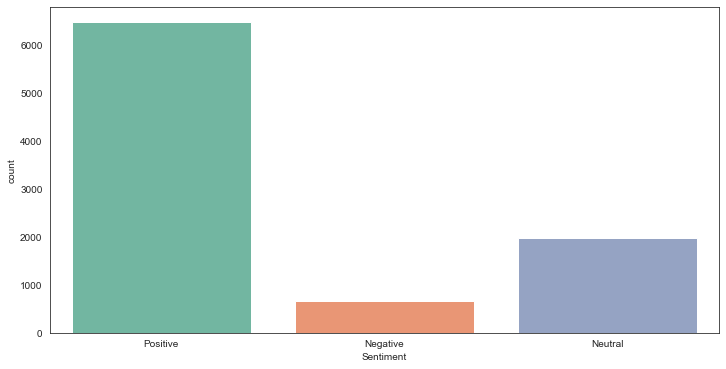

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

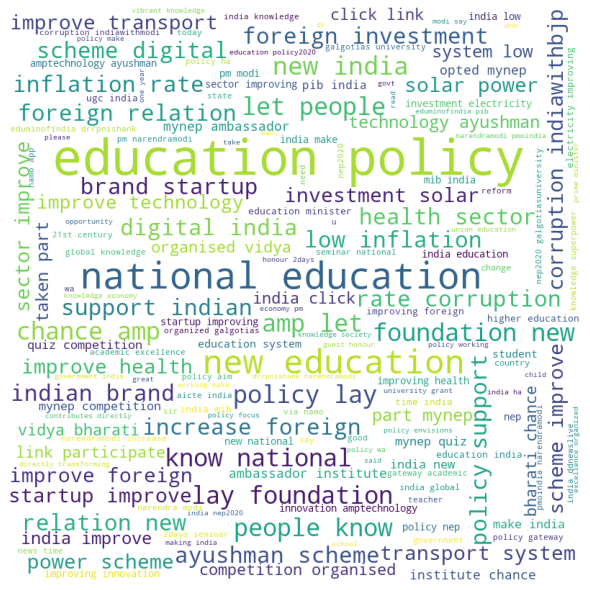

In [22]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.clean_tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

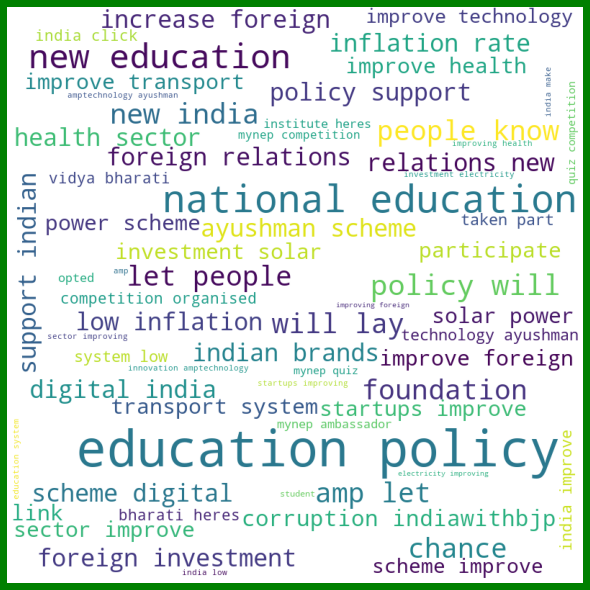

In [23]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [24]:
df['temp_list'] = df['clean_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [25]:
# Tree of the most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

# Postive word cloud

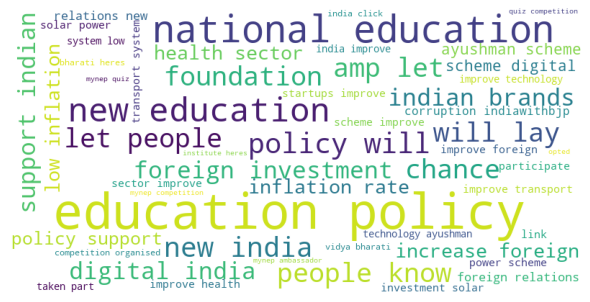

<Figure size 432x288 with 0 Axes>

In [26]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 4), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
plt.savefig('positive.png')

# negative word cloud

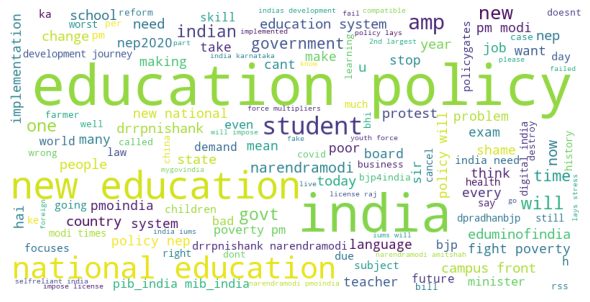

In [27]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_negative = df[df["Sentiment"]== "Negative"] 
# iterate through the csv file 
for val in df_negative.tweet: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 4), facecolor = "white") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [28]:
df

Datetime      Tweet Id  \
0     2021-11-14 19:47:24+00:00  1.460000e+18   
1     2021-11-14 14:03:56+00:00  1.460000e+18   
2     2021-11-14 06:32:57+00:00  1.460000e+18   
3     2021-11-14 04:44:08+00:00  1.460000e+18   
4     2021-11-14 04:03:27+00:00  1.460000e+18   
...                         ...           ...   
9098  2020-09-15 09:35:08+00:00  1.310000e+18   
9099  2020-09-15 09:18:35+00:00  1.310000e+18   
9100  2020-09-15 08:29:10+00:00  1.310000e+18   
9101  2020-09-15 08:28:40+00:00  1.310000e+18   
9102  2020-09-15 07:53:02+00:00  1.310000e+18   

                                                  tweet         Username  \
0     wionews palkisu yes let us have an uniform edu...       abdedaloho   
1     aninewsup yesterday it was bharat who went to ...        sasidash1   
2     need a new education policy for india present ...        vnshukla9   
3     happy childrens day to my dear tiny tots you a...     HJOGENSINGH2   
4     monica_thapar sadhgurujv so thats why sadhguru...      gowdapatils   
...                                                 ...              ...   
9098  national education policy were working to make...  SanjivRanjanJh1   
9099  national education policy were working to make...   ShivamGumber11   
9100  national education policy were working to make...      hari_feb_09   
9101  national education policy were working to make...       mygovindia   
9102  knowledge is power  mata swarasti sub ko aashi...      savitha_rao   

                                            clean_tweet  description_lengths  \
0     wionews palkisu yes let u uniform education po...                   30   
1     aninewsup yesterday wa bharat went ravana get ...                   25   
2     need new education policy india present educat...                   19   
3     happy childrens day dear tiny tot teacher teac...                   19   
4     monica thapar sadhgurujv thats sadhguru writin...                   12   
...                                                 ...                  ...   
9098  national education policy working make india k...                   16   
9099  national education policy working make india k...                   16   
9100  national education policy working make india k...                   16   
9101  national education policy working make india k...                   16   
9102  knowledge power mata swarasti sub ko aashirwad...                   25   

                                                 scores  compound Sentiment  \
0     {'neg': 0.22, 'neu': 0.523, 'pos': 0.257, 'com...    0.1531  Positive   
1     {'neg': 0.093, 'neu': 0.631, 'pos': 0.276, 'co...    0.7269  Positive   
2     {'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...   -0.4215  Negative   
3     {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...    0.7430  Positive   
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
...                                                 ...       ...       ...   
9098  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
9099  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
9100  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
9101  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   
9102  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral   

                                              temp_list  
0     [wionews, palkisu, yes, let, u, uniform, educa...  
1     [aninewsup, yesterday, wa, bharat, went, ravan...  
2     [need, new, education, policy, india, present,...  
3     [happy, childrens, day, dear, tiny, tot, teach...  
4     [monica, thapar, sadhgurujv, thats, sadhguru, ...  
...                                                 ...  
9098  [national, education, policy, working, make, i...  
9099  [national, education, policy, working, make, i...  
9100  [national, education, policy, working, make, i...  
9101  [national, education, pol

In [29]:
df.drop([ 'description_lengths' ,'scores' ,'temp_list' ],
 axis='columns', inplace=True)

In [30]:
#file_name = 'nep_SA.xlsx'
  
# saving the excel
#df.to_excel(file_name)
#print('DataFrame is written to Excel File successfully.')

In [31]:
df


Datetime      Tweet Id  \
0     2021-11-14 19:47:24+00:00  1.460000e+18   
1     2021-11-14 14:03:56+00:00  1.460000e+18   
2     2021-11-14 06:32:57+00:00  1.460000e+18   
3     2021-11-14 04:44:08+00:00  1.460000e+18   
4     2021-11-14 04:03:27+00:00  1.460000e+18   
...                         ...           ...   
9098  2020-09-15 09:35:08+00:00  1.310000e+18   
9099  2020-09-15 09:18:35+00:00  1.310000e+18   
9100  2020-09-15 08:29:10+00:00  1.310000e+18   
9101  2020-09-15 08:28:40+00:00  1.310000e+18   
9102  2020-09-15 07:53:02+00:00  1.310000e+18   

                                                  tweet         Username  \
0     wionews palkisu yes let us have an uniform edu...       abdedaloho   
1     aninewsup yesterday it was bharat who went to ...        sasidash1   
2     need a new education policy for india present ...        vnshukla9   
3     happy childrens day to my dear tiny tots you a...     HJOGENSINGH2   
4     monica_thapar sadhgurujv so thats why sadhguru...      gowdapatils   
...                                                 ...              ...   
9098  national education policy were working to make...  SanjivRanjanJh1   
9099  national education policy were working to make...   ShivamGumber11   
9100  national education policy were working to make...      hari_feb_09   
9101  national education policy were working to make...       mygovindia   
9102  knowledge is power  mata swarasti sub ko aashi...      savitha_rao   

                                            clean_tweet  compound Sentiment  
0     wionews palkisu yes let u uniform education po...    0.1531  Positive  
1     aninewsup yesterday wa bharat went ravana get ...    0.7269  Positive  
2     need new education policy india present educat...   -0.4215  Negative  
3     happy childrens day dear tiny tot teacher teac...    0.7430  Positive  
4     monica thapar sadhgurujv thats sadhguru writin...    0.0000   Neutral  
...                                                 ...       ...       ...  
9098  national education policy working make india k...    0.0000   Neutral  
9099  national education policy working make india k...    0.0000   Neutral  
9100  national education policy working make india k...    0.0000   Neutral  
9101  national education policy working make india k...    0.0000   Neutral  
9102  knowledge power mata swarasti sub ko aashirwad...    0.0000   Neutral  

[9103 rows x 7 columns]

# STEP- 4 : Numerical / Vectorial Representation of tweets
TFIDF - Term Frequency — Inverse Document Frequency

In [32]:
x=np.array(clean_text) #'x' contains text features
y=df.Sentiment # 'y' conntains the sentiment labels
y=np.array(y)

In [33]:
print(x.shape,y.shape)

(9103,) (9103,)


In [34]:
from sklearn.model_selection import train_test_split
#y = df[['pos_neg','pos_neu','neu_neg']]

#train_vectors = vectorizer.fit_transform(x).toarray()
X_train, X_test , Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(7282, 19678) (1821, 19678)


# STEP - 5 : ML MODELS

In [36]:
from  sklearn.metrics  import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1.GradientBoostingClassifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_vectors,Y_train)
gb_pred = gb.predict(test_vectors)
gb_acc = accuracy_score(Y_test,gb_pred)*100
gb_prec= precision_score(Y_test,gb_pred , average='macro')*100
gb_rec= recall_score(Y_test,gb_pred , average='macro')*100
gb_f1= f1_score(Y_test,gb_pred , average='macro')*100
gb_acc


# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(Y_test)
confusion_matrix(gb_pred,Y_test)
print(classification_report(gb_pred,Y_test))

              precision    recall  f1-score   support

    Negative       0.29      0.88      0.44        50
     Neutral       0.59      0.79      0.68       295
    Positive       0.96      0.83      0.89      1476

    accuracy                           0.82      1821
   macro avg       0.61      0.83      0.67      1821
weighted avg       0.88      0.82      0.84      1821



# 6.SVC

In [38]:

from sklearn.svm import SVC
lsvc = SVC(verbose=0)

lsvc.fit(train_vectors,Y_train)
lsvc_pred = lsvc.predict(test_vectors)
lsvc_acc = accuracy_score(Y_test,lsvc_pred )*100
lsvc_prec= precision_score(Y_test,lsvc_pred , average='macro')*100
lsvc_rec= recall_score(Y_test,lsvc_pred , average='macro')*100
lsvc_f1= f1_score(Y_test,lsvc_pred , average='macro')*100



In [39]:
lsvc_acc

86.65568369028006

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, lsvc_pred)))
print('Precision score: ', format(precision_score(Y_test, lsvc_pred , average='macro')))
print('Recall score: ', format(recall_score(Y_test, lsvc_pred , average='macro')))
print('F1 score: ', format(f1_score(Y_test, lsvc_pred , average='macro')))

Accuracy score:  0.8665568369028006
Precision score:  0.8915896763488943
Recall score:  0.6665816171315954
F1 score:  0.7260642654906424


# 2.DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(train_vectors,Y_train)
dt_pred = dt.predict(test_vectors)
dt_acc = accuracy_score(Y_test,dt_pred)*100
dt_prec= precision_score(Y_test,dt_pred , average='macro')*100
dt_rec= recall_score(Y_test,dt_pred , average='macro')*100
dt_f1= f1_score(Y_test,dt_pred , average='macro')*100
dt_acc
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(Y_test)
confusion_matrix(dt_pred,Y_test)
print(classification_report(dt_pred,Y_test))

              precision    recall  f1-score   support

    Negative       0.27      0.49      0.35        83
     Neutral       0.68      0.58      0.62       466
    Positive       0.86      0.86      0.86      1272

    accuracy                           0.77      1821
   macro avg       0.60      0.64      0.61      1821
weighted avg       0.79      0.77      0.78      1821



# 3.RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_vectors,Y_train)
rf_pred = rf.predict(test_vectors)

rf_acc = accuracy_score(Y_test,rf_pred)*100
rf_prec= precision_score(Y_test,rf_pred , average='macro' )*100
rf_rec= recall_score(Y_test,rf_pred , average='macro')*100
rf_f1= f1_score(Y_test,rf_pred , average='macro')*100
rf_acc


85.50247116968698

# 4.naive_bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB().fit(train_vectors, Y_train)
nb_pred = nb.predict(test_vectors)
nb_acc = accuracy_score(Y_test,nb_pred)*100
nb_prec= precision_score(Y_test,nb_pred , average='macro')*100
nb_rec= recall_score(Y_test,nb_pred , average='macro')*100
nb_f1= f1_score(Y_test,nb_pred , average='macro')*100
nb_acc

78.91268533772653

# 5.LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_vectors, Y_train)
log_pred = log.predict(test_vectors)

log_acc = accuracy_score(Y_test,log_pred)*100
log_prec= precision_score(Y_test,log_pred , average='macro')*100
log_rec= recall_score(Y_test,log_pred , average='macro')*100
log_f1= f1_score(Y_test,log_pred , average='macro')*100
log_acc

86.32619439868205

# STEP -6 : Performance Evalutation

# 1.naive_bayes

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, nb_pred )))
print('Precision score: ', format(precision_score(Y_test, nb_pred , average=None)))
print('Recall score: ', format(recall_score(Y_test, nb_pred , average=None)))
print('F1 score: ', format(f1_score(Y_test, nb_pred , average=None)))

Accuracy score:  0.7891268533772653
Precision score:  [1.         0.90909091 0.7747858 ]
Recall score:  [0.07333333 0.40506329 0.99216301]
F1 score:  [0.13664596 0.56042032 0.87010309]


# 2.RandomForestClassifier

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, rf_pred)))
print('Precision score: ', format(precision_score(Y_test, rf_pred , average=None)))
print('Recall score: ', format(recall_score(Y_test, rf_pred , average=None)))
print('F1 score: ', format(f1_score(Y_test, rf_pred , average=None)))

Accuracy score:  0.8550247116968699
Precision score:  [0.93617021 0.78385417 0.87194245]
Recall score:  [0.29333333 0.76202532 0.94984326]
F1 score:  [0.44670051 0.77278562 0.90922731]


 # 3.Logistic Regression


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, log_pred)))
print('Precision score: ', format(precision_score(Y_test, log_pred, average=None)))
print('Recall score: ', format(recall_score(Y_test, log_pred, average=None)))
print('F1 score: ', format(f1_score(Y_test, log_pred, average=None)))

Accuracy score:  0.8632619439868204
Precision score:  [0.87234043 0.85671642 0.86448923]
Recall score:  [0.27333333 0.72658228 0.97492163]
F1 score:  [0.41624365 0.78630137 0.91639042]


# 4.Gradient Boosting

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, gb_pred)))
print('Precision score: ', format(precision_score(Y_test, gb_pred , average=None)))
print('Recall score: ', format(recall_score(Y_test, gb_pred , average=None)))
print('F1 score: ', format(f1_score(Y_test, gb_pred , average=None)))

Accuracy score:  0.8226249313563976
Precision score:  [0.88       0.78983051 0.82723577]
Recall score:  [0.29333333 0.58987342 0.95689655]
F1 score:  [0.44       0.67536232 0.88735465]


In [49]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(Y_test)
confusion_matrix(gb_pred,Y_test)
print(classification_report(gb_pred,Y_test))

              precision    recall  f1-score   support

    Negative       0.29      0.88      0.44        50
     Neutral       0.59      0.79      0.68       295
    Positive       0.96      0.83      0.89      1476

    accuracy                           0.82      1821
   macro avg       0.61      0.83      0.67      1821
weighted avg       0.88      0.82      0.84      1821



# 5.Decison Trees

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(Y_test, dt_pred)))
print('Precision score: ', format(precision_score(Y_test, dt_pred , average=None)))
print('Recall score: ', format(recall_score(Y_test, dt_pred , average=None)))
print('F1 score: ', format(f1_score(Y_test, dt_pred , average=None)))

Accuracy score:  0.7732015376166941
Precision score:  [0.4939759  0.57725322 0.86320755]
Recall score:  [0.27333333 0.68101266 0.86050157]
F1 score:  [0.35193133 0.62485482 0.86185243]


In [51]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(Y_test)
confusion_matrix(dt_pred,Y_test)
print(classification_report(dt_pred,Y_test))

              precision    recall  f1-score   support

    Negative       0.27      0.49      0.35        83
     Neutral       0.68      0.58      0.62       466
    Positive       0.86      0.86      0.86      1272

    accuracy                           0.77      1821
   macro avg       0.60      0.64      0.61      1821
weighted avg       0.79      0.77      0.78      1821



In [52]:
max(nb_f1,rf_f1,dt_f1,log_f1,gb_f1)

70.9571145677996

In [53]:
#print(classification_report(predictions,y_test))

# PLOTTING 
accuracy and precision

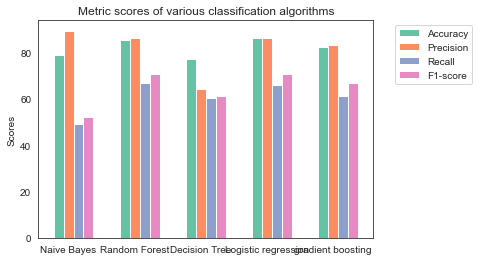

In [54]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Naive Bayes','Random Forest','Decision Tree','Logistic regression','gradient boosting']
accuracy=[nb_acc,rf_acc,dt_acc,log_acc,gb_acc]
precision=[nb_prec,rf_prec,dt_prec,log_prec,gb_prec]
recall=[nb_rec,rf_rec,dt_rec,log_rec,gb_rec]
f1_score=[nb_f1,rf_f1,dt_f1,log_f1,gb_f1]

width = 0.3  
r1 = np.arange(0,len(labels)*2,2) 
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]


rects1 = plt.bar(r1, accuracy, width, label='Accuracy')
rects2 = plt.bar(r2, precision, width, label='Precision')
rects3 = plt.bar(r3, recall, width, label='Recall')
rects4 = plt.bar(r4, f1_score, width, label='F1-score')
plt.rcParams["figure.figsize"] = (15,5)

plt.ylabel('Scores')
plt.title('Metric scores of various classification algorithms')
plt.xticks([r + width for r in range(0,len(labels)*2,2)], ['Naive Bayes','Random Forest','Decision Tree','Logistic regression','gradient boosting'])
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))
plt.show()


In [55]:

nb_acc,dt_acc,rf_acc,log_acc ,gb_acc ,lsvc_acc

(78.91268533772653,
 77.3201537616694,
 85.50247116968698,
 86.32619439868205,
 82.26249313563976,
 86.65568369028006)

In [56]:
max(nb_acc,rf_acc,dt_acc,log_acc,gb_acc)

86.32619439868205

In [65]:
nb_rec,dt_rec,rf_rec,log_rec,gb_rec,lsvc_rec

(49.01865446256542,
 60.49491863197668,
 66.8400636659039,
 65.827908063613,
 61.33677675929968,
 66.65816171315953)

In [57]:
nb_prec,dt_prec,rf_prec,log_prec,gb_prec,lsvc_prec

(89.46255702681651,
 64.48122232227963,
 86.3988941825263,
 86.45153573577853,
 83.23554269440999,
 89.15896763488944)

In [58]:
df

Datetime      Tweet Id  \
0     2021-11-14 19:47:24+00:00  1.460000e+18   
1     2021-11-14 14:03:56+00:00  1.460000e+18   
2     2021-11-14 06:32:57+00:00  1.460000e+18   
3     2021-11-14 04:44:08+00:00  1.460000e+18   
4     2021-11-14 04:03:27+00:00  1.460000e+18   
...                         ...           ...   
9098  2020-09-15 09:35:08+00:00  1.310000e+18   
9099  2020-09-15 09:18:35+00:00  1.310000e+18   
9100  2020-09-15 08:29:10+00:00  1.310000e+18   
9101  2020-09-15 08:28:40+00:00  1.310000e+18   
9102  2020-09-15 07:53:02+00:00  1.310000e+18   

                                                  tweet         Username  \
0     wionews palkisu yes let us have an uniform edu...       abdedaloho   
1     aninewsup yesterday it was bharat who went to ...        sasidash1   
2     need a new education policy for india present ...        vnshukla9   
3     happy childrens day to my dear tiny tots you a...     HJOGENSINGH2   
4     monica_thapar sadhgurujv so thats why sadhguru...      gowdapatils   
...                                                 ...              ...   
9098  national education policy were working to make...  SanjivRanjanJh1   
9099  national education policy were working to make...   ShivamGumber11   
9100  national education policy were working to make...      hari_feb_09   
9101  national education policy were working to make...       mygovindia   
9102  knowledge is power  mata swarasti sub ko aashi...      savitha_rao   

                                            clean_tweet  compound Sentiment  
0     wionews palkisu yes let u uniform education po...    0.1531  Positive  
1     aninewsup yesterday wa bharat went ravana get ...    0.7269  Positive  
2     need new education policy india present educat...   -0.4215  Negative  
3     happy childrens day dear tiny tot teacher teac...    0.7430  Positive  
4     monica thapar sadhgurujv thats sadhguru writin...    0.0000   Neutral  
...                                                 ...       ...       ...  
9098  national education policy working make india k...    0.0000   Neutral  
9099  national education policy working make india k...    0.0000   Neutral  
9100  national education policy working make india k...    0.0000   Neutral  
9101  national education policy working make india k...    0.0000   Neutral  
9102  knowledge power mata swarasti sub ko aashirwad...    0.0000   Neutral  

[9103 rows x 7 columns]

In [59]:
df.to_csv('file1.csv')

In [60]:
df1 = df.compound
df1

0       0.1531
1       0.7269
2      -0.4215
3       0.7430
4       0.0000
         ...  
9098    0.0000
9099    0.0000
9100    0.0000
9101    0.0000
9102    0.0000
Name: compound, Length: 9103, dtype: float64

In [61]:
df

Datetime      Tweet Id  \
0     2021-11-14 19:47:24+00:00  1.460000e+18   
1     2021-11-14 14:03:56+00:00  1.460000e+18   
2     2021-11-14 06:32:57+00:00  1.460000e+18   
3     2021-11-14 04:44:08+00:00  1.460000e+18   
4     2021-11-14 04:03:27+00:00  1.460000e+18   
...                         ...           ...   
9098  2020-09-15 09:35:08+00:00  1.310000e+18   
9099  2020-09-15 09:18:35+00:00  1.310000e+18   
9100  2020-09-15 08:29:10+00:00  1.310000e+18   
9101  2020-09-15 08:28:40+00:00  1.310000e+18   
9102  2020-09-15 07:53:02+00:00  1.310000e+18   

                                                  tweet         Username  \
0     wionews palkisu yes let us have an uniform edu...       abdedaloho   
1     aninewsup yesterday it was bharat who went to ...        sasidash1   
2     need a new education policy for india present ...        vnshukla9   
3     happy childrens day to my dear tiny tots you a...     HJOGENSINGH2   
4     monica_thapar sadhgurujv so thats why sadhguru...      gowdapatils   
...                                                 ...              ...   
9098  national education policy were working to make...  SanjivRanjanJh1   
9099  national education policy were working to make...   ShivamGumber11   
9100  national education policy were working to make...      hari_feb_09   
9101  national education policy were working to make...       mygovindia   
9102  knowledge is power  mata swarasti sub ko aashi...      savitha_rao   

                                            clean_tweet  compound Sentiment  
0     wionews palkisu yes let u uniform education po...    0.1531  Positive  
1     aninewsup yesterday wa bharat went ravana get ...    0.7269  Positive  
2     need new education policy india present educat...   -0.4215  Negative  
3     happy childrens day dear tiny tot teacher teac...    0.7430  Positive  
4     monica thapar sadhgurujv thats sadhguru writin...    0.0000   Neutral  
...                                                 ...       ...       ...  
9098  national education policy working make india k...    0.0000   Neutral  
9099  national education policy working make india k...    0.0000   Neutral  
9100  national education policy working make india k...    0.0000   Neutral  
9101  national education policy working make india k...    0.0000   Neutral  
9102  knowledge power mata swarasti sub ko aashirwad...    0.0000   Neutral  

[9103 rows x 7 columns]

Text(0, 0.5, 'Polarity')

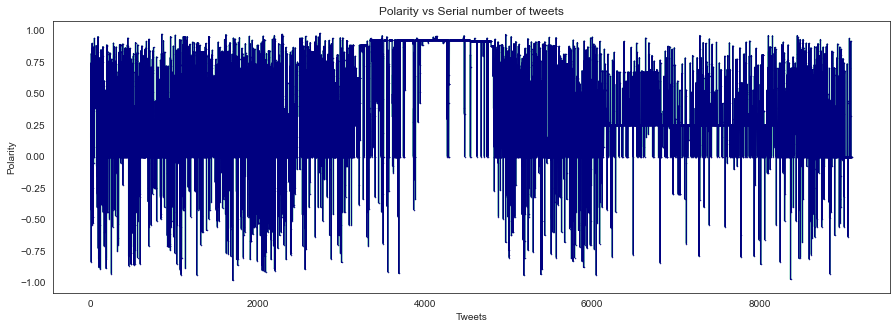

In [62]:
df1.plot()
ax = df1.plot(lw=1, colormap='jet', marker='.', markersize=1, title='Polarity vs Serial number of tweets')
ax.set_xlabel("Tweets")
ax.set_ylabel("Polarity")

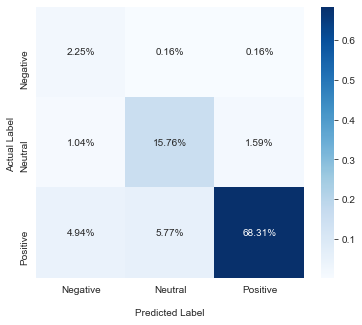

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(log_pred,Y_test)/np.sum(confusion_matrix(gb_pred,Y_test)), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'])
plt.gcf().set_size_inches(6, 5)
## Display the visualization of the Confusion Matrix.
plt.show()

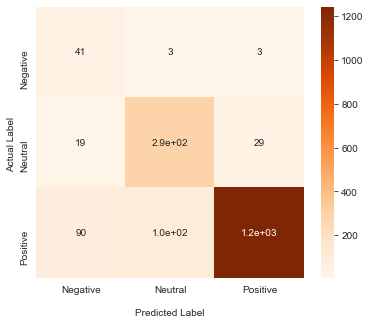

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(log_pred,Y_test), annot=True, cmap='Oranges')

ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('Actual Label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'])
plt.gcf().set_size_inches(6, 5)
## Display the visualization of the Confusion Matrix.
plt.show()

In [66]:
nb_f1,dt_f1,rf_f1,log_f1,gb_f1,lsvc_f1


(52.238979025095055,
 61.28795279099596,
 70.9571145677996,
 70.63118160860307,
 66.75723233344569,
 72.60642654906424)